In [1]:
import os
import random
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D ,Dense ,Activation ,MaxPooling2D ,Dropout ,Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#讀取資料夾mnist下的42000張圖片，圖片為灰階圖，所以為1通道，圖像大小28*28
def load_data():
    data_1 = np.empty((75,1,300,400),dtype="float32")
    label_1 = np.empty((75,),dtype="uint8")
    data_2 = np.empty((25,1,300,400),dtype="float32")
    label_2 = np.empty((25,),dtype="uint8")

    imgs_1 = os.listdir("/content/drive/MyDrive/ML_dataset/trainImg")
    num_1 = len(imgs_1)
    for i in range(num_1):
        img_1 = Image.open("/content/drive/MyDrive/ML_dataset/trainImg/"+imgs_1[i])
        re_img_1=img_1.resize((400, 300))
        gray_img_1 = re_img_1.convert('L')
        arr_1 = np.asarray(gray_img_1,dtype="float32")
        data_1[i,:,:,:] = arr_1
        label_1[i] = int(imgs_1[i].split('_')[0])

    imgs_2 = os.listdir("/content/drive/MyDrive/ML_dataset/testImg")
    num_2 = len(imgs_2)
    for i in range(num_2):
        img_2 = Image.open("/content/drive/MyDrive/ML_dataset/testImg/"+imgs_2[i])
        re_img_2=img_2.resize((400, 300))
        gray_img_2 = re_img_2.convert('L')
        arr_2 = np.asarray(gray_img_2,dtype="float32")
        data_2[i,:,:,:] = arr_2
        label_2[i] = int(imgs_2[i].split('_')[0])

    return (data_1,label_1), (data_2,label_2)


In [3]:
from sklearn import metrics
batch_size = 128
num_classes = 7
epochs = 50

# the data, split between train and test sets
#(x_train, y_train), (x_test, y_test) = mnist.load_data()
(x_train, y_train), (x_test, y_test) = load_data()

x_train = x_train.reshape(75, 120000)
x_test = x_test.reshape(25, 120000)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(120000,)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy',
                  keras.metrics.Precision(name='precision'),
                  keras.metrics.Recall(name='recall')])

train_history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))



75 train samples
25 test samples
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               15360128  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 7)                 903       
                                                                 
Total params: 15,377,543
Trainable params: 15,377,543
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50


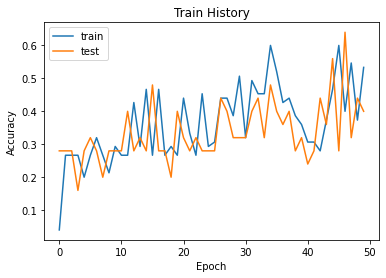

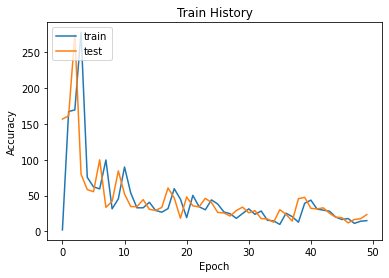

success


In [4]:
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

show_train_history('accuracy','val_accuracy')
show_train_history('loss','val_loss')

# Save model
try:
    model.save_weights("mnist.h5")
    print("success")
except:
    print("error")


In [ ]:

def plot_image(image):
    fig=plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image,cmap='binary')
    plt.show()
    
img=np.array(Image.open('test.jpg').convert('L'))
plot_image(img)

x_Test = img.reshape(1,784).astype('float32')
x_Test_normalize = x_Test.astype('float32') / 255.0


predict_x=model.predict(x_Test) 
prediction=np.argmax(predict_x,axis=1)
print(prediction[0])

prediction=model.predict(x_Test)
print(prediction[0])

predict_x_normalize=model.predict(x_Test_normalize) 
prediction=np.argmax(predict_x_normalize,axis=1)
print(prediction[0])

prediction=model.predict(x_Test_normalize)
print(prediction[0])